In [114]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import pandas as pd
from PIL import Image
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/Projects/wordcloud/game_of_thrones.csv')
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,NaN,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,28-Apr-19,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,5-May-19,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,12-May-19,12.48,5.9


In [ ]:
data["Title"] = data["Title"].apply(str).str.lower()
text = ' '.join(data['Title'])

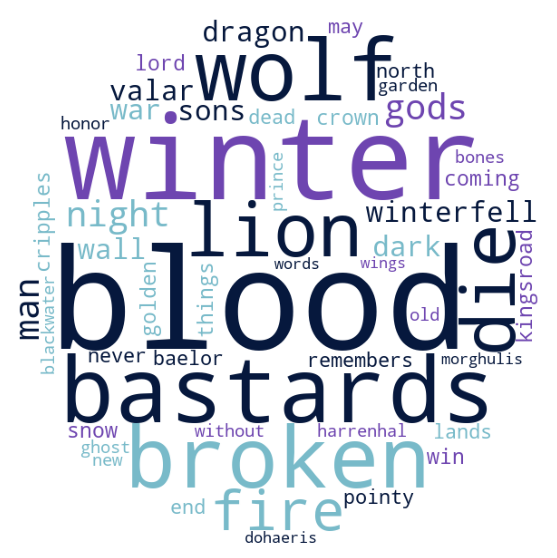

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 10))
    # No axis details
    plt.axis("off")
    # Display image
    plt.imshow(wordcloud) 

def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    #Colors in hsl format
    colors = [[220, 83, 13],
              [263, 44, 48],
              [191, 43, 63]]
    #randomize the color
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

mask = np.array(Image.open("/content/drive/MyDrive/Projects/wordcloud/round.png"))
wordcloud = WordCloud(mask=mask, width=300, height=300, random_state=1, max_words=50, background_color='white', 
                      color_func=multi_color_func, collocations=False,contour_color=None)
wordcloud.generate(text)         
wordcloud.to_file('/content/drive/MyDrive/Projects/wordcloud/cloud.png')
# Plot
plot_cloud(wordcloud)